In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (Matplotlib에서 한글 깨짐 방지)
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")  # Windows 사용자의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 기본 라이브러리
import polars as pl
import pandas as pd
import seaborn as sns

# 시각화용 색상 팔레트
color_palette = sns.color_palette("Set2", as_cmap=False)

### 데이터 불러오기

In [2]:
CUSTOMER_SCORE_금리_고객집계 = pl.read_csv('./dataset/CUSTOMER_SCORE_금리_고객집계.csv')

In [3]:
CUSTOMER_SCORE_금리_고객집계.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급
i64,f64,f64,f64,f64,f64,i64,f64,i64,i64,i64,str
8029049273,277419.354839,0.0,0.0,0.0,0.0,36,45.204301,1,1,60,"""일반등급"""
7217905638,516129.032258,0.0,0.0,1.2819e6,0.0,36,298.589247,2,2,40,"""일반등급"""
6357187164,683870.967742,0.0,0.0,18709.677419,5.5581e6,36,2071.695161,3,1,30,"""일반등급"""
5830406301,706451.612903,2.8065e6,0.0,645.16129,0.0,36,194.67957,3,2,30,"""일반등급"""
7438371436,5.3548e6,6.1065e7,0.0,0.0,0.0,36,2925.870968,3,3,50,"""일반등급"""


In [4]:
CUSTOMER_SCORE_금리 = pl.read_csv('./dataset/CUSTOMER_SCORE_금리.csv')

In [5]:
CUSTOMER_SCORE_금리

고객ID,기준년월,연령대,성별,고객등급,입출금예금,기타예금,비이자상품,카드,대출,기준금리,보유상품수,거래기간(개월),총점수
i64,i64,i64,str,str,i64,i64,i64,i64,i64,f64,i64,i64,f64
9999998161,202106,60,"""여""","""일반등급""",11000000,0,0,60000,0,4.55,2,6,1040.533333
9999997589,202106,60,"""남""","""일반등급""",0,10400000,0,0,0,4.55,2,6,436.0
9999991579,202106,60,"""여""","""일반등급""",0,30000000,0,0,0,4.55,1,6,1210.0
9999989448,202106,60,"""남""","""일반등급""",400000,0,0,0,0,4.55,1,6,42.0
9999988325,202106,60,"""남""","""일반등급""",2700000,0,0,0,0,4.55,1,6,178.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2000384629,202312,60,"""남""","""일반등급""",0,0,0,0,100000,9.18,1,1,17.991667
2000380811,202312,30,"""남""","""일반등급""",0,0,0,0,100000,9.18,1,1,17.991667
2000379801,202312,20,"""여""","""일반등급""",0,0,0,0,100000,9.18,1,1,17.991667


In [6]:
상품집계_고객집계 = pl.read_csv('./dataset/상품집계_고객집계.csv')

# 전체
## 연령대별 보유상품 수 pivot table

In [7]:
pivot = (
    CUSTOMER_SCORE_금리
    .group_by(["연령대", "보유상품수"])
    .agg(pl.count().alias("고객수"))
    .pivot(
        values="고객수",
        index="연령대",
        columns="보유상품수"
    )
    .fill_null(0)  # 결측값은 0으로 채움
    .sort("연령대")
)

In [8]:
pivot

연령대,7,3,1,5,0,6,2,4
i64,u32,u32,u32,u32,u32,u32,u32,u32
10,0,190149,2019526,979,674257,35,851003,18378
20,156,764938,2961742,11271,2521132,1366,2008227,144100
30,627,723367,3024898,21469,2262085,4524,1961104,198217
40,1377,1125224,3940544,53529,1923319,8889,2684156,348626
50,1191,1488906,4187531,88144,1443822,11031,3119581,536549
60,401,1822006,6837596,87313,1736206,8259,3825617,679282


## 클러스터 간 코사인 유사도

In [9]:
# A : 저활동 그룹(클러스터 0)
# B : 저활동 그룹(클러스터 1,5)
# C : 중간활동 그룹(클러스터 4,6,7)
# D : 고활동 그룹(클러스터 2,3,8)

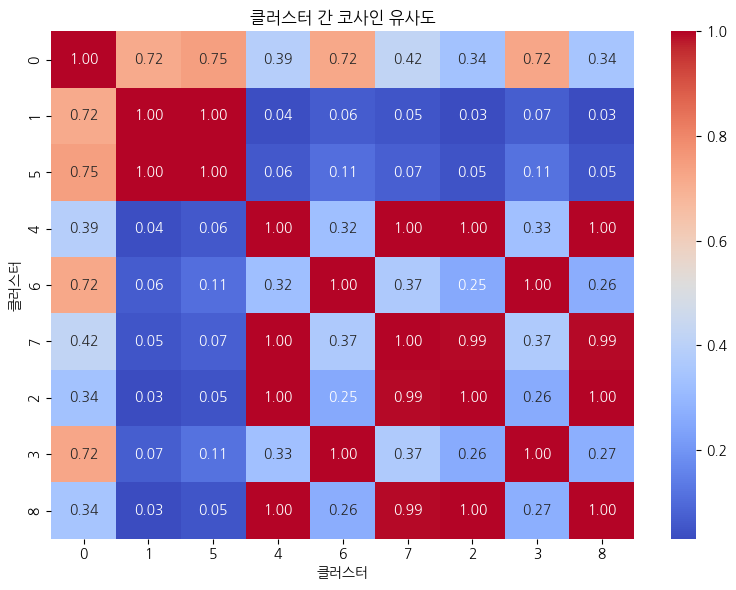

In [10]:
# 1. 모듈 import
import polars as pl
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# 2. CSV 파일 불러오기
df_joined_inner_data_agg = pl.read_csv("./dataset/df_joined_inner_data_agg.csv")

# 3. 사용할 컬럼 정의
selected_features = [
    "평균_입출금예금", "평균_기타예금", "평균_대출금액", "평균_카드", 
    "최대_보유상품종류", "평균_보유상품종류", "평균_총점수", "거래기간(개월)"
]
cluster_col = "KMeans_DB_KneeLocato_2030"

df_pl = df_joined_inner_data_agg.clone()

# 4. 그룹별 평균값 계산
cluster_summary_pl = df_pl.group_by(cluster_col).mean().select([cluster_col] + selected_features)

# 5. Pandas로 변환 (코사인 유사도 계산용)
cluster_summary_pd = cluster_summary_pl.to_pandas().set_index(cluster_col)

# 6. 코사인 유사도 계산
similarity_matrix = pd.DataFrame(
    cosine_similarity(cluster_summary_pd),
    index=cluster_summary_pd.index,
    columns=cluster_summary_pd.index
)

# 7. 히트맵 시각화
# 원하는 순서 지정
desired_order = [0, 1, 5, 4, 6, 7, 2, 3, 8]

# 행과 열 순서를 재정렬
reordered_matrix = similarity_matrix.loc[desired_order, desired_order]

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("클러스터 간 코사인 유사도")
plt.xlabel("클러스터")
plt.ylabel("클러스터")
plt.tight_layout()
plt.show()


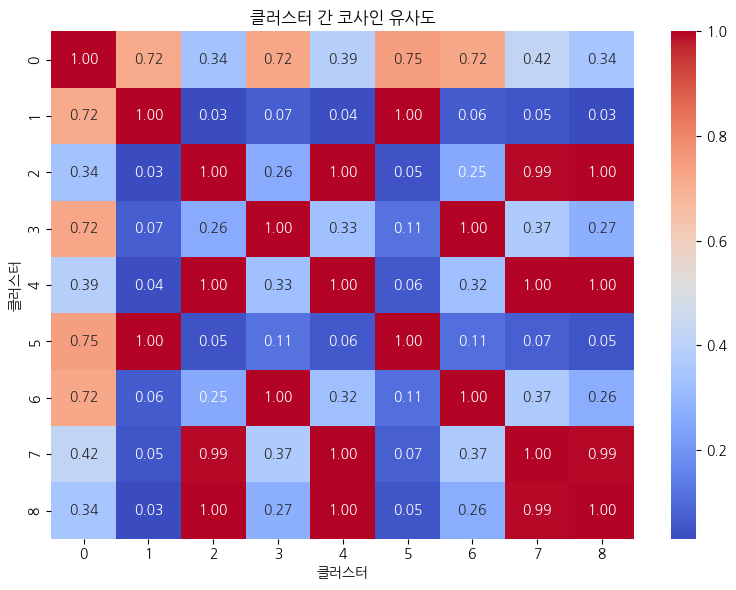

In [11]:
# 원하는 순서 지정
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# 행과 열 순서를 재정렬
reordered_matrix = similarity_matrix.loc[desired_order, desired_order]

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("클러스터 간 코사인 유사도")
plt.xlabel("클러스터")
plt.ylabel("클러스터")
plt.tight_layout()
plt.show()


## 연령대별 포트폴리오 구성 pie chart

In [12]:
customer_agg_kmeans_db_거리_6 = pl.read_csv('./dataset/customer_agg_kmeans_db_거리_6.csv')

In [13]:
customer_agg_kmeans_db_거리_6.head(2)

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출,평균_총점수,거래기간(개월),연령대,최대_보유상품종류,평균_보유상품종류,KMeans_DB_거리기반
i64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64
3527493725,35483.870968,6451.612903,0.0,0.0,0.0,21.010753,36,30,2,0,1
5825588873,380645.16129,0.0,0.0,53548.387097,0.0,67.584946,36,20,2,1,1


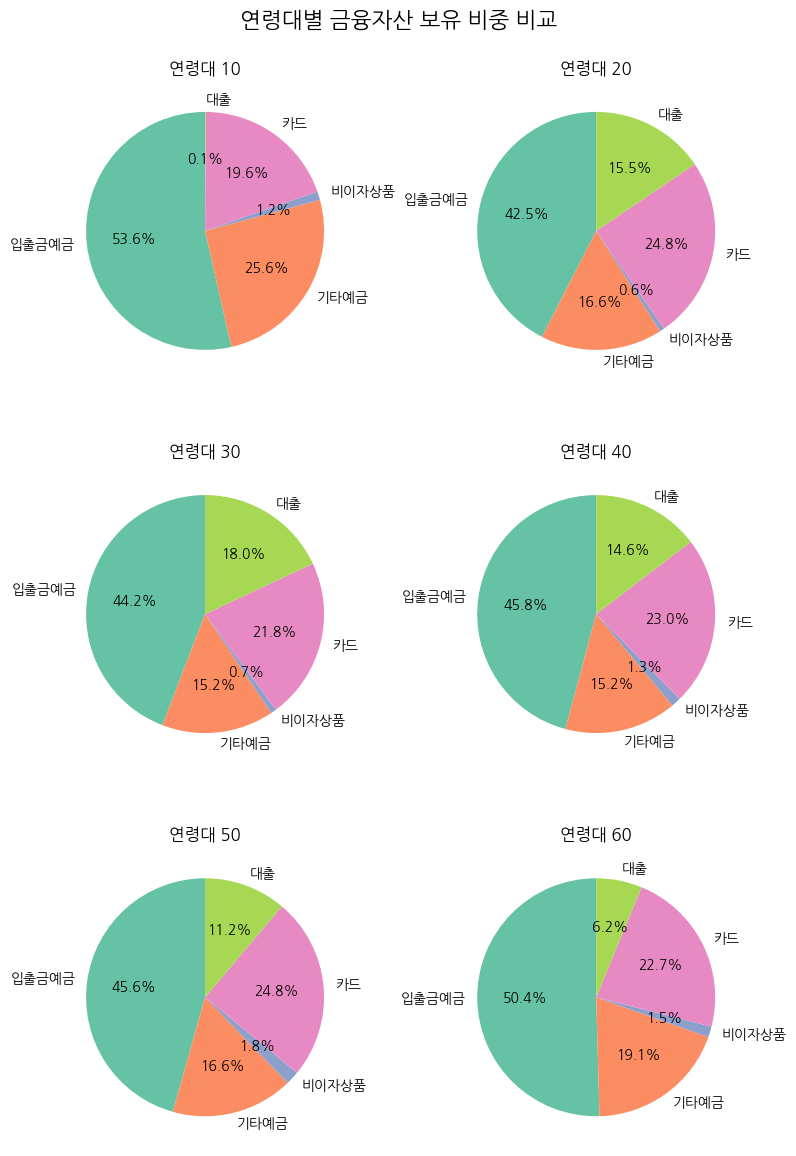

In [14]:
"""
📌 연령대별 금융자산 보유율 분석 및 파이 차트 시각화

이 코드는 고객 데이터를 바탕으로 연령대별 금융상품 보유율을 계산하고, 이를 파이 차트 형태로 시각화합니다.

[1] 금융상품 보유 여부 파생 컬럼 생성:
    - '평균_입출금예금', '평균_기타예금', '평균_비이자상품', '평균_카드', '평균_대출' 값을 기준으로
      각 항목의 평균 잔액이 0보다 크면 '보유(1)', 아니면 '미보유(0)'로 이진 컬럼 생성

[2] 연령대별 집계:
    - 연령대 단위로 그룹화하여 총 고객 수 및 상품별 보유자 수를 집계
    - 보유율(%) = (해당 상품 보유자 수 / 총 고객 수) * 100 으로 계산하여 파생 컬럼 생성

[3] 시각화:
    - 각 연령대별로 금융상품 보유율(5개 항목)을 원그래프로 시각화
    - subplot은 2열 고정, 행은 연령대 수에 맞게 자동 조정
    - 남는 subplot은 자동으로 숨김 처리하여 깔끔한 배치 유지

[🎯 주요 목적]
    - 연령대별로 금융상품(예금·카드·대출 등) 보유 특성을 시각적으로 비교
    - 금융 상품 포트폴리오 다양성 및 보유 경향 파악에 활용 가능
"""


# 예금/카드/대출 보유 여부 컬럼 생성
df = customer_agg_kmeans_db_거리_6.with_columns([
    (pl.col("평균_입출금예금") > 0).cast(pl.Int8).alias("입출금예금_보유"),
    (pl.col("평균_기타예금") > 0).cast(pl.Int8).alias("기타예금_보유"),
    (pl.col("평균_비이자상품") > 0).cast(pl.Int8).alias("비이자상품_보유"),
    (pl.col("평균_카드") > 0).cast(pl.Int8).alias("카드_보유"),
    (pl.col("평균_대출") > 0).cast(pl.Int8).alias("대출_보유")
])

# 클러스터별 집계
summary = df.group_by("연령대").agg([
    pl.count().alias("고객수"),
    pl.sum("입출금예금_보유").alias("입출금예금_보유자수"),
    pl.sum("기타예금_보유").alias("기타예금_보유자수"),
    pl.sum("비이자상품_보유").alias("비이자상품_보유자수"),    
    pl.sum("카드_보유").alias("카드_보유자수"),
    pl.sum("대출_보유").alias("대출_보유자수"),
]).with_columns([
    (pl.col("입출금예금_보유자수") / pl.col("고객수") * 100).alias("입출금예금_보유율(%)"),
    (pl.col("기타예금_보유자수") / pl.col("고객수") * 100).alias("기타예금_보유율(%)"),
    (pl.col("비이자상품_보유자수") / pl.col("고객수") * 100).alias("비이자상품_보유율(%)"),
    (pl.col("카드_보유자수") / pl.col("고객수") * 100).alias("카드_보유율(%)"),
    (pl.col("대출_보유자수") / pl.col("고객수") * 100).alias("대출_보유율(%)"),
]).rename({"연령대": "연령대"}).sort("연령대")

# 시각화
summary_pd = summary.to_pandas()
num_clusters = len(summary_pd["연령대"].unique())

import math

# 연령대 개수에 따라 subplot 개수 계산
num_clusters = len(summary_pd["연령대"].unique())
cols = 2
rows = math.ceil(num_clusters / cols)

# 플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # ✅ 1차원 배열로 변환

colors = sns.color_palette("Set2", 5)
labels = ["입출금예금", "기타예금", "비이자상품", "카드", "대출"]

for i, cluster in enumerate(summary_pd["연령대"]):
    cluster_data = summary_pd[summary_pd["연령대"] == cluster]
    values = cluster_data[[
        "입출금예금_보유율(%)", "기타예금_보유율(%)",
        "비이자상품_보유율(%)", "카드_보유율(%)", "대출_보유율(%)"
    ]].values.flatten()

    axes[i].pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
    axes[i].set_title(f"연령대 {cluster}", fontsize=12)

# 남은 subplot은 숨김
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("연령대별 금융자산 보유 비중 비교", fontsize=16)
plt.tight_layout()
plt.show()

# 2030
## 고객 유형(중분류)별 금융상품 보유율을 계산하고 파이 차트

In [15]:
상품집계_고객집계.head(2)

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,f64,f64,f64,f64,f64,i64,f64,i64,i64,i64,str,i64,str
2065204669,0.0,0.0,0.0,0.0,1.85e6,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,722580.645161,1.3355e6,0.0,1.0152e6,0.0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""


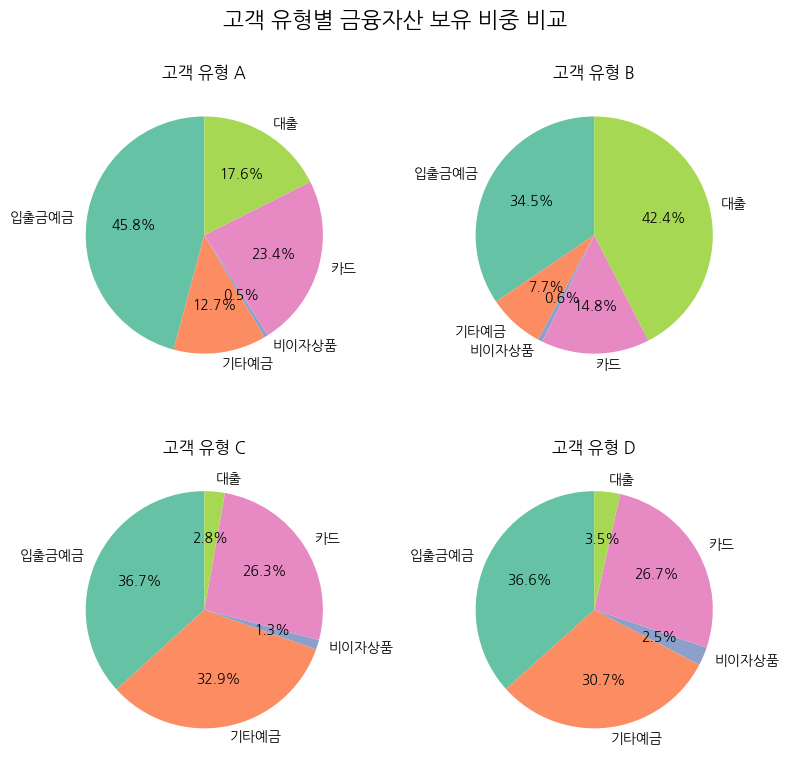

In [16]:
"""
고객 유형(중분류)별 금융상품 보유율을 계산하고 파이 차트로 시각화하는 코드입니다.

1. 금융상품 보유 여부 생성:
   - 평균 잔액이 0보다 크면 보유(1), 아니면 미보유(0)로 처리
   - 예금(입출금/기타/비이자), 카드, 대출 항목별로 보유 여부 컬럼 생성

2. 고객 유형(중분류)별 집계:
   - 총 고객 수, 상품별 보유자 수 계산
   - 보유율(%) = 보유자수 / 고객수 * 100 계산

3. 시각화:
   - 고객 유형별로 파이 차트를 생성
   - 금융자산 보유율을 시각적으로 비교
   - 2행 2열 subplot 배열로 구성
   - 고객 유형 수보다 subplot이 많으면 빈 차트는 자동 숨김
"""

# 예금/카드/대출 보유 여부 컬럼 생성
df = 상품집계_고객집계.with_columns([
    (pl.col("평균_입출금예금") > 0).cast(pl.Int8).alias("입출금예금_보유"),
    (pl.col("평균_기타예금") > 0).cast(pl.Int8).alias("기타예금_보유"),
    (pl.col("평균_비이자상품") > 0).cast(pl.Int8).alias("비이자상품_보유"),
    (pl.col("평균_카드") > 0).cast(pl.Int8).alias("카드_보유"),
    (pl.col("평균_대출금액") > 0).cast(pl.Int8).alias("대출_보유")
])

# 클러스터별 집계
summary = df.group_by("중분류").agg([
    pl.count().alias("고객수"),
    pl.sum("입출금예금_보유").alias("입출금예금_보유자수"),
    pl.sum("기타예금_보유").alias("기타예금_보유자수"),
    pl.sum("비이자상품_보유").alias("비이자상품_보유자수"),    
    pl.sum("카드_보유").alias("카드_보유자수"),
    pl.sum("대출_보유").alias("대출_보유자수"),
]).with_columns([
    (pl.col("입출금예금_보유자수") / pl.col("고객수") * 100).alias("입출금예금_보유율(%)"),
    (pl.col("기타예금_보유자수") / pl.col("고객수") * 100).alias("기타예금_보유율(%)"),
    (pl.col("비이자상품_보유자수") / pl.col("고객수") * 100).alias("비이자상품_보유율(%)"),
    (pl.col("카드_보유자수") / pl.col("고객수") * 100).alias("카드_보유율(%)"),
    (pl.col("대출_보유자수") / pl.col("고객수") * 100).alias("대출_보유율(%)"),
]).rename({"중분류": "고객유형"}).sort("고객유형")

# 시각화
summary_pd = summary.to_pandas()
num_clusters = len(summary_pd["고객유형"].unique())

rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
colors = sns.color_palette("Set2", 5)

for i, cluster in enumerate(summary_pd["고객유형"]):
    row, col = divmod(i, cols)
    cluster_data = summary_pd[summary_pd["고객유형"] == cluster]
    values = cluster_data[["입출금예금_보유율(%)", "기타예금_보유율(%)", "비이자상품_보유율(%)", "카드_보유율(%)", "대출_보유율(%)"]].values.flatten()
    labels = ["입출금예금", "기타예금", "비이자상품", "카드", "대출"]
    axes[row, col].pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
    axes[row, col].set_title(f"고객 유형 {cluster}", fontsize=12)

for i in range(num_clusters, rows * cols):
    row, col = divmod(i, cols)
    axes[row, col].axis("off")

plt.suptitle("고객 유형별 금융자산 보유 비중 비교", fontsize=16)
plt.tight_layout()
plt.show()


## 고객 유형별 상품 별 boxplot

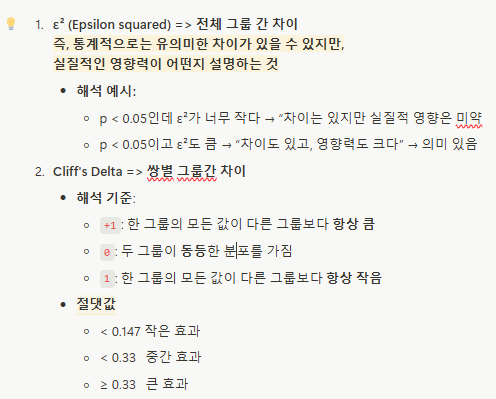


평균_입출금예금 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_입출금예금 - Kruskal-Wallis 결과
→ 통계량: 87863.3458, p-value: 0.0000
→ 효과 크기 (ε²): 0.1466 (큼)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
     A    B              C              D
A  1.0  0.0   0.000000e+00   0.000000e+00
B  0.0  1.0   0.000000e+00   0.000000e+00
C  0.0  0.0   1.000000e+00  1.511449e-285
D  0.0  0.0  1.511449e-285   1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


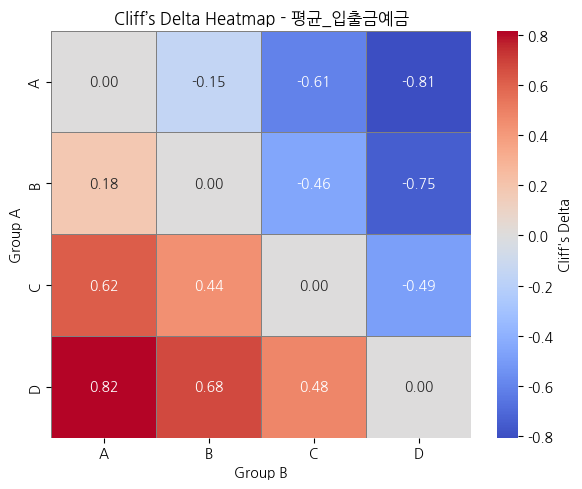

----------------------------------------------------------------------


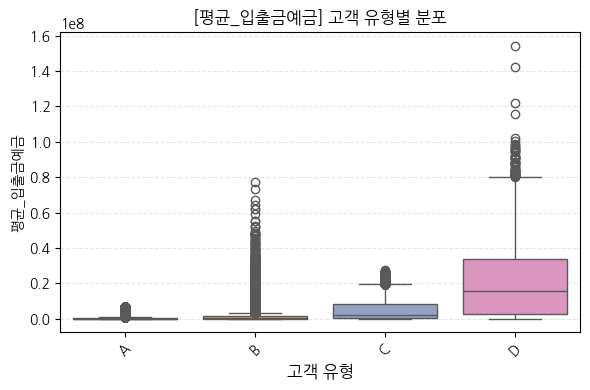


평균_기타예금 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_기타예금 - Kruskal-Wallis 결과
→ 통계량: 190816.2931, p-value: 0.0000
→ 효과 크기 (ε²): 0.3183 (큼)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
              A             B         C         D
A  1.000000e+00  6.407188e-11  0.000000  0.000000
B  6.407188e-11  1.000000e+00  0.000000  0.000000
C  0.000000e+00  0.000000e+00  1.000000  0.000057
D  0.000000e+00  0.000000e+00  0.000057  1.000000

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


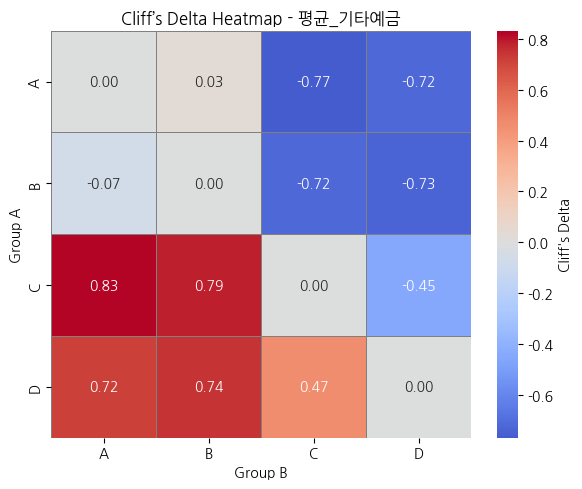

----------------------------------------------------------------------


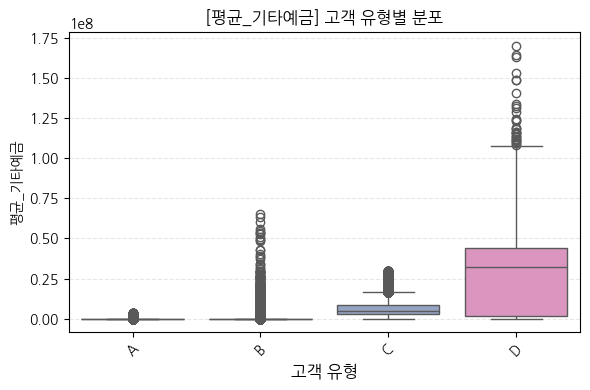


평균_비이자상품 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_비이자상품 - Kruskal-Wallis 결과
→ 통계량: 5039.6092, p-value: 0.0000
→ 효과 크기 (ε²): 0.0084 (작음)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
              A              B              C              D
A  1.000000e+00   1.018977e-23   0.000000e+00   0.000000e+00
B  1.018977e-23   1.000000e+00  2.606812e-147  5.762917e-301
C  0.000000e+00  2.606812e-147   1.000000e+00  8.717256e-129
D  0.000000e+00  5.762917e-301  8.717256e-129   1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


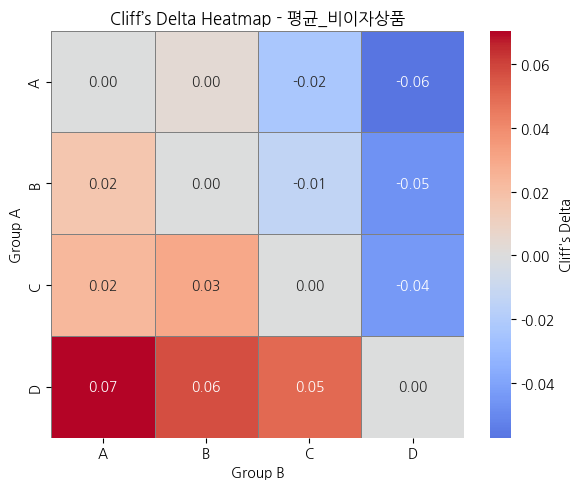

----------------------------------------------------------------------


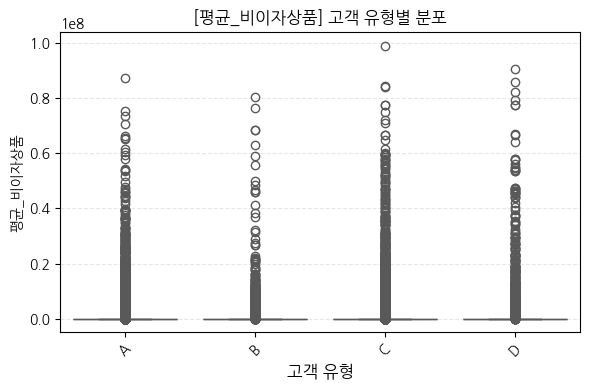


평균_카드 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_카드 - Kruskal-Wallis 결과
→ 통계량: 26524.4070, p-value: 0.0000
→ 효과 크기 (ε²): 0.0442 (작음)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
          A         B             C             D
A  1.000000  0.005371  0.000000e+00  0.000000e+00
B  0.005371  1.000000  0.000000e+00  0.000000e+00
C  0.000000  0.000000  1.000000e+00  3.704017e-36
D  0.000000  0.000000  3.704017e-36  1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


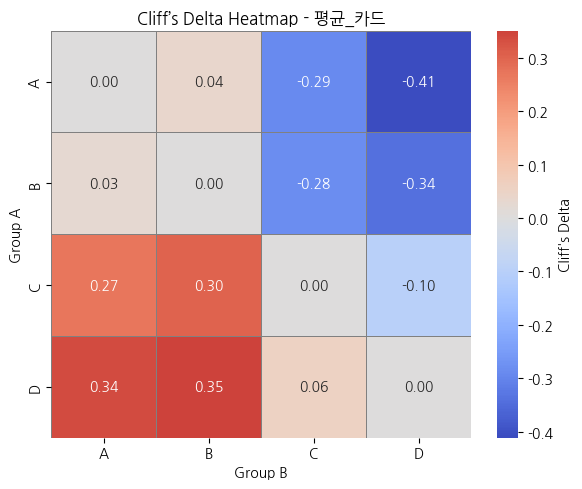

----------------------------------------------------------------------


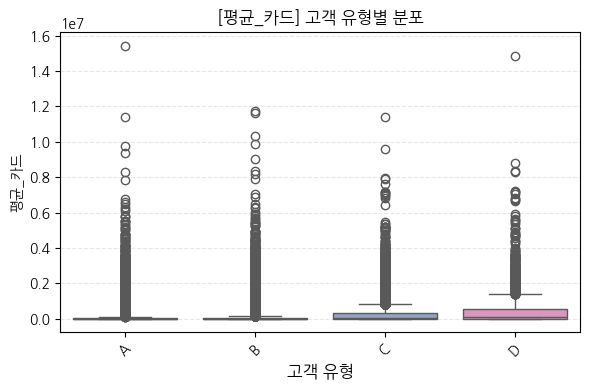


평균_대출금액 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_대출금액 - Kruskal-Wallis 결과
→ 통계량: 161733.8291, p-value: 0.0000
→ 효과 크기 (ε²): 0.2698 (큼)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
               A    B             C              D
A   1.000000e+00  0.0  0.000000e+00  9.278838e-277
B   0.000000e+00  1.0  0.000000e+00   0.000000e+00
C   0.000000e+00  0.0  1.000000e+00   7.061310e-07
D  9.278838e-277  0.0  7.061310e-07   1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


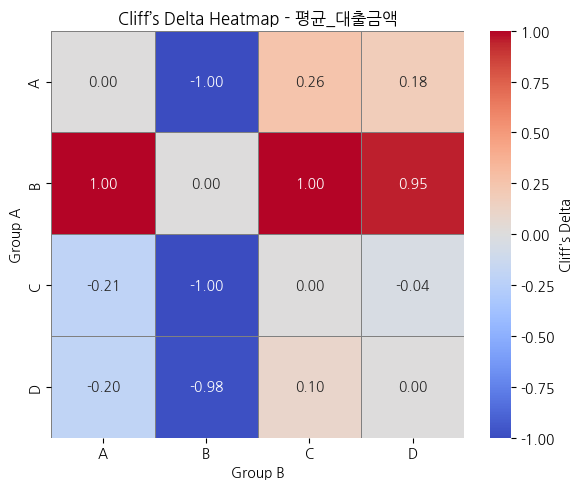

----------------------------------------------------------------------


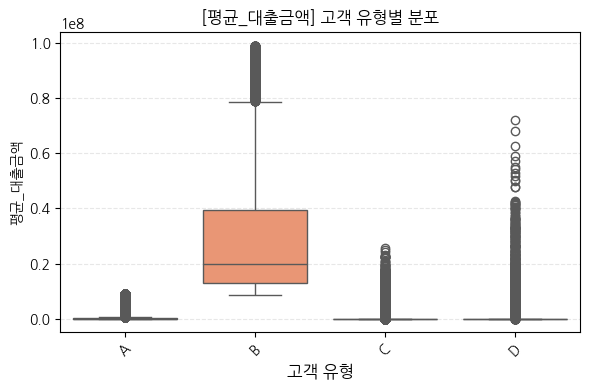


평균_총점수 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_총점수 - Kruskal-Wallis 결과
→ 통계량: 209302.5660, p-value: 0.0000
→ 효과 크기 (ε²): 0.3491 (큼)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
     A             B    C             D
A  1.0  0.000000e+00  0.0  0.000000e+00
B  0.0  1.000000e+00  0.0  4.565636e-30
C  0.0  0.000000e+00  1.0  0.000000e+00
D  0.0  4.565636e-30  0.0  1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


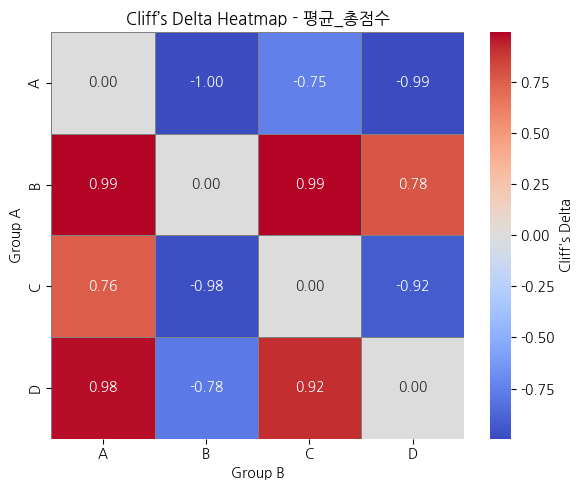

----------------------------------------------------------------------


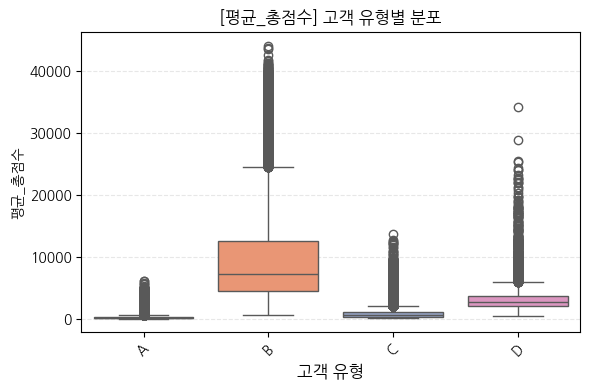


거래기간(개월) - 클러스터별 유의성 분석
정규성: X | 등분산성: X

거래기간(개월) - Kruskal-Wallis 결과
→ 통계량: 37128.3737, p-value: 0.0000
→ 효과 크기 (ε²): 0.0619 (중간)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
              A    B              C              D
A  1.000000e+00  0.0   0.000000e+00   5.020887e-64
B  0.000000e+00  1.0   0.000000e+00   0.000000e+00
C  0.000000e+00  0.0   1.000000e+00  2.081345e-144
D  5.020887e-64  0.0  2.081345e-144   1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


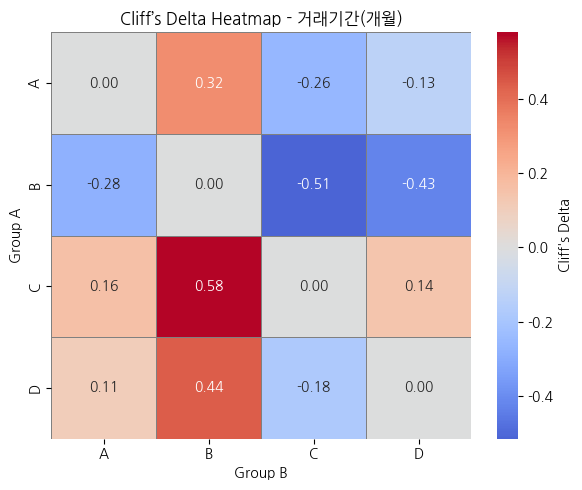

----------------------------------------------------------------------


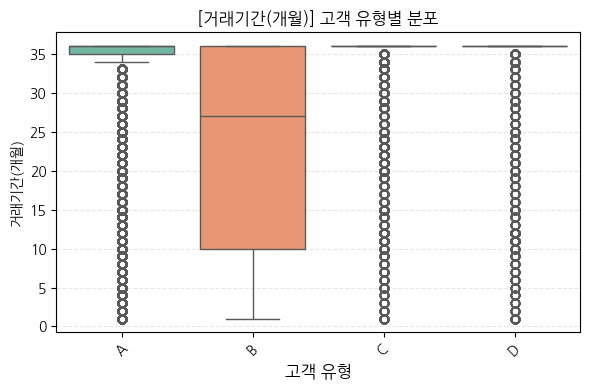


최대_보유상품종류 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

최대_보유상품종류 - Kruskal-Wallis 결과
→ 통계량: 89578.4151, p-value: 0.0000
→ 효과 크기 (ε²): 0.1494 (큼)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
     A    B             C             D
A  1.0  0.0  0.000000e+00  0.000000e+00
B  0.0  1.0  0.000000e+00  0.000000e+00
C  0.0  0.0  1.000000e+00  9.426717e-40
D  0.0  0.0  9.426717e-40  1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


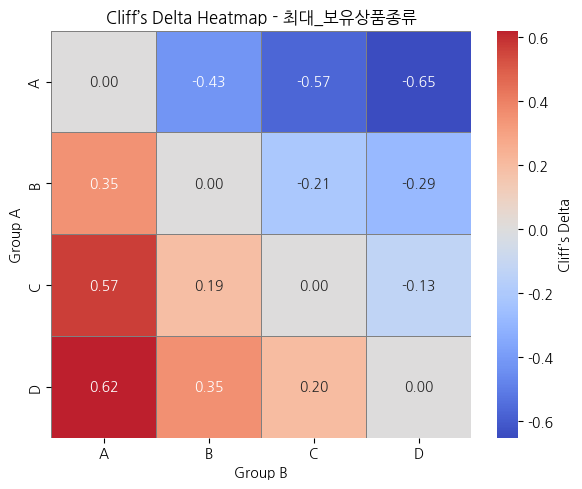

----------------------------------------------------------------------


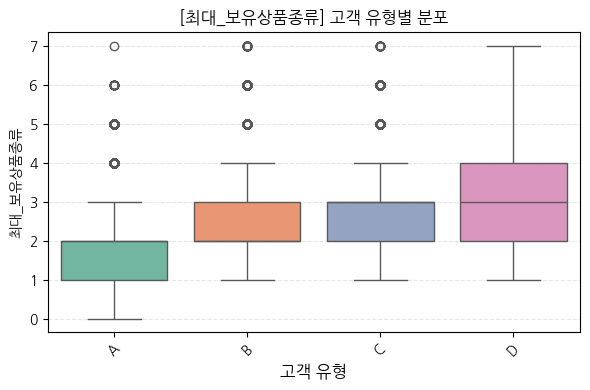


평균_보유상품종류 - 클러스터별 유의성 분석
정규성: X | 등분산성: X

평균_보유상품종류 - Kruskal-Wallis 결과
→ 통계량: 110030.1649, p-value: 0.0000
→ 효과 크기 (ε²): 0.1835 (큼)
유의미한 차이 있음

사후분석 (Dunn’s Test, Bonferroni 조정):
p-value Matrix:
     A    B             C             D
A  1.0  0.0  0.000000e+00  0.000000e+00
B  0.0  1.0  0.000000e+00  0.000000e+00
C  0.0  0.0  1.000000e+00  6.248619e-98
D  0.0  0.0  6.248619e-98  1.000000e+00

유의미한 차이 여부 (p < 0.05):
       A      B      C      D
A  False   True   True   True
B   True  False   True   True
C   True   True  False   True
D   True   True   True  False


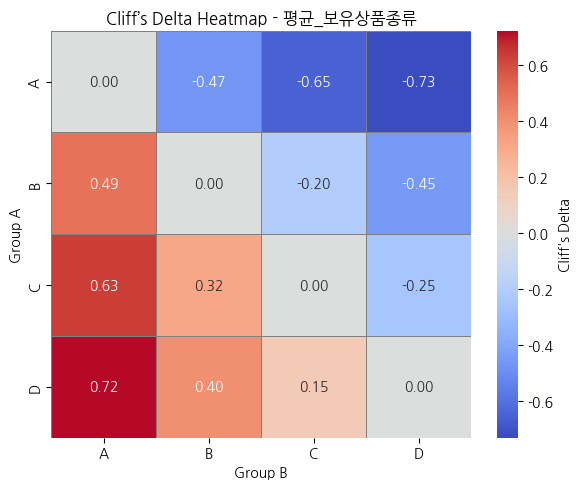

----------------------------------------------------------------------


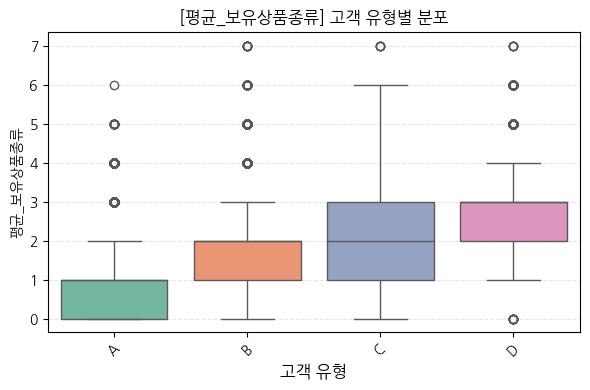

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
from itertools import combinations, product

warnings.filterwarnings('ignore')

# ✅ 분석 대상 DataFrame
df = 상품집계_고객집계.to_pandas()

# ✅ 분석 대상 변수 목록
features = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품", 
    "평균_카드", "평균_대출금액", "평균_총점수", "거래기간(개월)",
    "최대_보유상품종류", "평균_보유상품종류"
]

cluster_col = "중분류"

# ✅ Cliff's Delta 샘플 기반 계산 함수
def cliffs_delta_sampled(x, y, sample_size=300):
    x = np.random.choice(x, min(len(x), sample_size), replace=False)
    y = np.random.choice(y, min(len(y), sample_size), replace=False)
    nx, ny = len(x), len(y)
    more = sum(a > b for a in x for b in y)
    less = sum(a < b for a in x for b in y)
    return (more - less) / (nx * ny)

# ✅ 분석 루프
for feature in features:
    print("\n" + "=" * 70)
    print(f"{feature} - 클러스터별 유의성 분석")
    print("=" * 70)

    grouped = df.groupby(cluster_col)
    group_values = [group[feature].dropna().values for name, group in grouped]
    group_dict = {name: group[feature].dropna().values for name, group in grouped}

    normal = all(shapiro(g)[1] > 0.05 for g in group_values)
    equal_var = levene(*group_values)[1] > 0.05
    print(f"정규성: {'충족' if normal else 'X'} | 등분산성: {'충족' if equal_var else 'X'}")

    if normal and equal_var:
        stat, p = f_oneway(*group_values)
        test_name = "ANOVA"
        epsilon_sq = None
    else:
        stat, p = kruskal(*group_values)
        test_name = "Kruskal-Wallis"
        n_total = sum(len(g) for g in group_values)
        k_groups = len(group_values)
        epsilon_sq = (stat - k_groups + 1) / (n_total - k_groups)

    print(f"\n{feature} - {test_name} 결과")
    print(f"→ 통계량: {stat:.4f}, p-value: {p:.4f}")
    if epsilon_sq is not None:
        print(f"→ 효과 크기 (ε²): {epsilon_sq:.4f} {'(작음)' if epsilon_sq < 0.06 else '(중간)' if epsilon_sq < 0.14 else '(큼)'}")

    if p < 0.05:
        print("유의미한 차이 있음")

        if test_name == "ANOVA":
            print("\n사후분석 (Tukey HSD):")
            tukey_result = pairwise_tukeyhsd(endog=df[feature], groups=df[cluster_col], alpha=0.05)
            tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
            tukey_df["유의미한 차이"] = tukey_df["p-adj"] < 0.05
            print(tukey_df)
        else:
            print("\n사후분석 (Dunn’s Test, Bonferroni 조정):")
            dunn_result = sp.posthoc_dunn(df, val_col=feature, group_col=cluster_col, p_adjust='bonferroni')
            dunn_bool = dunn_result < 0.05
            print("p-value Matrix:")
            print(dunn_result)
            print("\n유의미한 차이 여부 (p < 0.05):")
            print(dunn_bool)

            # ✅ Cliff's Delta 히트맵 생성
            clusters = sorted(group_dict.keys())
            delta_matrix = pd.DataFrame(index=clusters, columns=clusters)

            for g1, g2 in product(clusters, clusters):
                if g1 == g2:
                    delta_matrix.loc[g1, g2] = 0
                else:
                    d = cliffs_delta_sampled(group_dict[g1], group_dict[g2])
                    delta_matrix.loc[g1, g2] = d

            delta_matrix = delta_matrix.astype(float)

            # ✅ 히트맵 시각화
            plt.figure(figsize=(6, 5))
            sns.heatmap(delta_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f",
                        linewidths=0.5, linecolor='gray', cbar_kws={'label': "Cliff's Delta"})
            plt.title(f"Cliff’s Delta Heatmap - {feature}")
            plt.ylabel("Group A")
            plt.xlabel("Group B")
            plt.tight_layout()
            plt.show()
    else:
        print("유의미한 차이 없음")

    print("-" * 70)

    # ✅ 변수별 박스플롯
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=cluster_col, y=feature, palette="Set2", showfliers=True, order=sorted(df[cluster_col].unique()))
    plt.title(f"[{feature}] 고객 유형별 분포")
    plt.xlabel("고객 유형", fontsize=12)
    plt.xticks(fontsize=10, rotation=45)
    plt.ylabel(feature)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## 고객 유형 내 고객 등급별 고객 수

In [18]:
temp = 상품집계_고객집계.select(["최대_고객등급", "중분류"]).group_by(["최대_고객등급", "중분류"]).count().sort("count", descending=True)
temp_pd = temp.to_pandas()
temp_pd

,최대_고객등급,중분류,count
0,일반등급,A,484586
1,일반등급,C,70406
2,일반등급,B,35353
3,일반등급,D,7800
4,우수등급,D,871
5,우수등급,C,128
6,우수등급,B,100
7,최우수등급,D,88
8,최우수등급,C,86
9,최우수등급,A,39


## 고객유형별 대출 금액 barplot

In [19]:
상품집계_고객집계.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,f64,f64,f64,f64,f64,i64,f64,i64,i64,i64,str,i64,str
2065204669,0.0,0.0,0.0,0.0,1.85e6,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,722580.645161,1.3355e6,0.0,1.0152e6,0.0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""
4720215619,190322.580645,6451.612903,0.0,0.0,0.0,36,41.44086,2,1,30,"""일반등급""",0,"""A"""
4139190886,7.8290e6,0.0,0.0,6129.032258,0.0,36,655.55914,2,1,20,"""일반등급""",6,"""C"""
2243610603,200000.0,0.0,0.0,10000.0,5.65e6,6,1487.988889,3,2,20,"""일반등급""",0,"""A"""


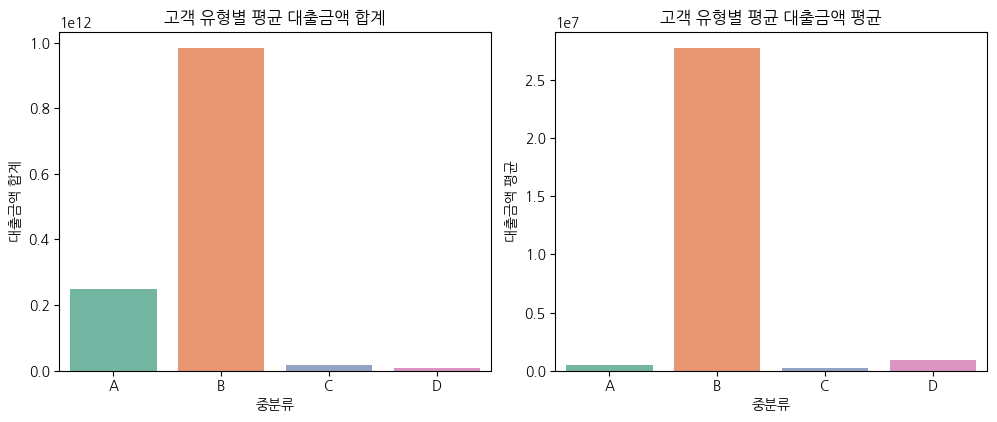

In [20]:
df = 상품집계_고객집계.clone()

# 중분류별 대출금액 합계 및 평균 계산
loan_summary = (
    상품집계_고객집계
    .group_by("중분류")
    .agg([
        pl.sum("평균_대출금액").alias("sum"),
        pl.mean("평균_대출금액").alias("mean")
    ])
    .to_pandas()
)

# ✅ 중분류 순서 정렬
category_order = ["A", "B", "C", "D"]
loan_summary["중분류"] = pd.Categorical(loan_summary["중분류"], categories=category_order, ordered=True)
loan_summary = loan_summary.sort_values("중분류")

# ✅ 서브플롯 구성
fig, axes = plt.subplots(1, 2, figsize=(10.07, 4.32)  # 100 dpi 기준
)  # 1행 2열

# 1️⃣ 합계 그래프
sns.barplot(data=loan_summary, x="중분류", y="sum", palette="Set2", ax=axes[0])
axes[0].set_title("고객 유형별 평균 대출금액 합계")
axes[0].set_xlabel("중분류")
axes[0].set_ylabel("대출금액 합계")

# 2️⃣ 평균 그래프
sns.barplot(data=loan_summary, x="중분류", y="mean", palette="Set2", ax=axes[1])
axes[1].set_title("고객 유형별 평균 대출금액 평균")
axes[1].set_xlabel("중분류")
axes[1].set_ylabel("대출금액 평균")

plt.tight_layout()
#plt.savefig('대출금액_평균_합계_고객유형별.png', dpi=300)
plt.show()

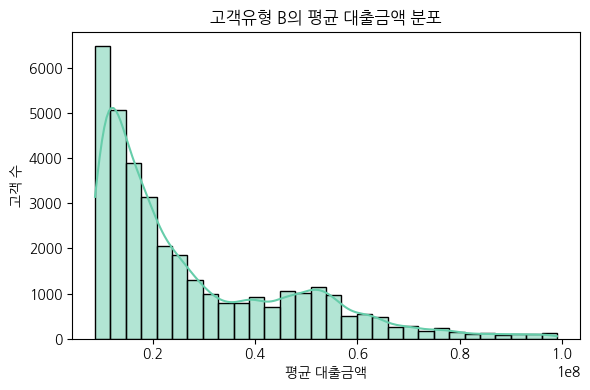

In [21]:
# 중분류가 'B'인 고객만 필터링
df_b = 상품집계_고객집계.filter(pl.col("중분류") == "B").to_pandas()

# 히스토그램 시각화
plt.figure(figsize=(6, 4))
sns.histplot(df_b["평균_대출금액"], bins=30, kde=True, color="mediumaquamarine")
plt.title("고객유형 B의 평균 대출금액 분포")
plt.xlabel("평균 대출금액")
plt.ylabel("고객 수")
plt.tight_layout()
#plt.savefig('고객유형B_대출금액_히스토그램.png', dpi=300)
plt.show()


## 레이더 차트

In [22]:
상품집계_고객집계.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,f64,f64,f64,f64,f64,i64,f64,i64,i64,i64,str,i64,str
2065204669,0.0,0.0,0.0,0.0,1.85e6,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,722580.645161,1.3355e6,0.0,1.0152e6,0.0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""
4720215619,190322.580645,6451.612903,0.0,0.0,0.0,36,41.44086,2,1,30,"""일반등급""",0,"""A"""
4139190886,7.8290e6,0.0,0.0,6129.032258,0.0,36,655.55914,2,1,20,"""일반등급""",6,"""C"""
2243610603,200000.0,0.0,0.0,10000.0,5.65e6,6,1487.988889,3,2,20,"""일반등급""",0,"""A"""


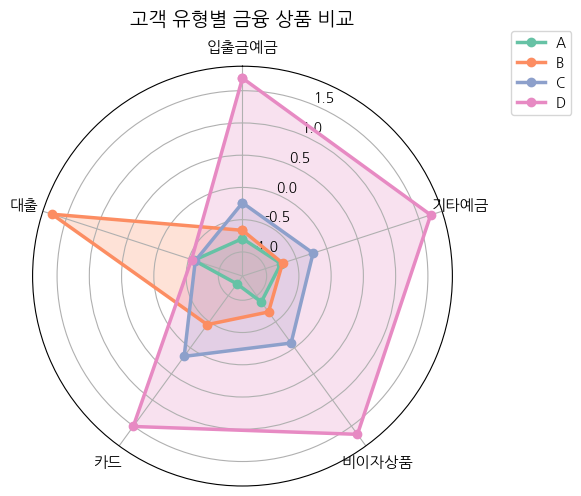

In [27]:
from sklearn.preprocessing import StandardScaler




# 🔍 필요한 컬럼만 선택
columns = [
    "중분류", 
    "평균_입출금예금", 
    "평균_기타예금", 
    "평균_비이자상품", 
    "평균_카드", 
    "평균_대출금액"
]

df_selected = 상품집계_고객집계.select(columns)

# 📊 중분류별 평균값으로 집계 (polars → pandas 변환)
df_grouped = (
    df_selected
    .group_by("중분류")
    .mean()
    .to_pandas()
)

# 4. 정규화 (MinMaxScaler)
value_cols = [
    "평균_입출금예금",
    "평균_기타예금",
    "평균_비이자상품",
    "평균_카드",
    "평균_대출금액"
]

scaler = StandardScaler()
df_grouped_scaled = df_grouped.copy()
df_grouped_scaled[value_cols] = scaler.fit_transform(df_grouped[value_cols])

short_labels = ["입출금예금", "기타예금", "비이자상품", "카드", "대출"]

# ▶ Set2에서 4가지 색상 가져오기
palette = sns.color_palette("Set2", 4)

# ▶ 중분류를 A → D 순서대로 색상 고정 매핑
ordered_labels = ["A", "B", "C", "D"]
color_map = dict(zip(ordered_labels, palette))

def make_radar_chart(data, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for 중분류 in ordered_labels:  # A → D 순서대로 그리기
        row = data[data["중분류"] == 중분류].iloc[0]
        values = row[value_cols].tolist()
        values += values[:1]
        color = color_map[중분류]

        # ax.plot(angles, values, label=중분류, color=color)
        # ax.fill(angles, values, alpha=0.15, color=color)
        ax.plot(angles, values, label=중분류, color=color, linewidth=2.5, marker="o")
        ax.fill(angles, values, alpha=0.25, color=color)


    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
    ax.set_title(title, size=14, pad=30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    #plt.savefig('radar_chart.png')
    plt.show()


# 실행
make_radar_chart(df_grouped_scaled, short_labels, "고객 유형별 금융 상품 비교")


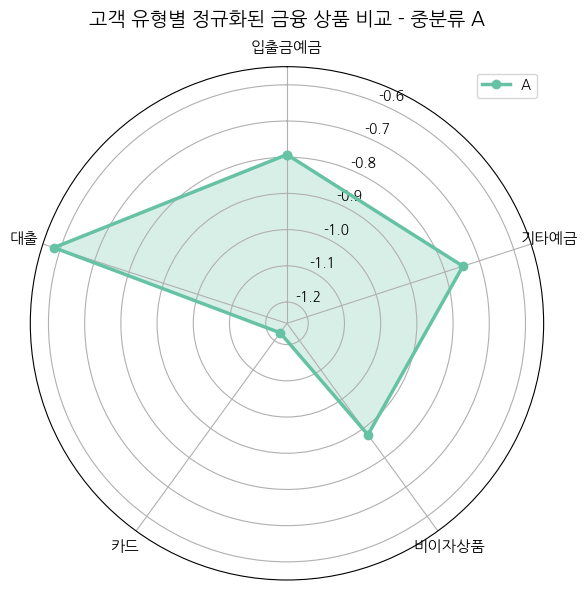

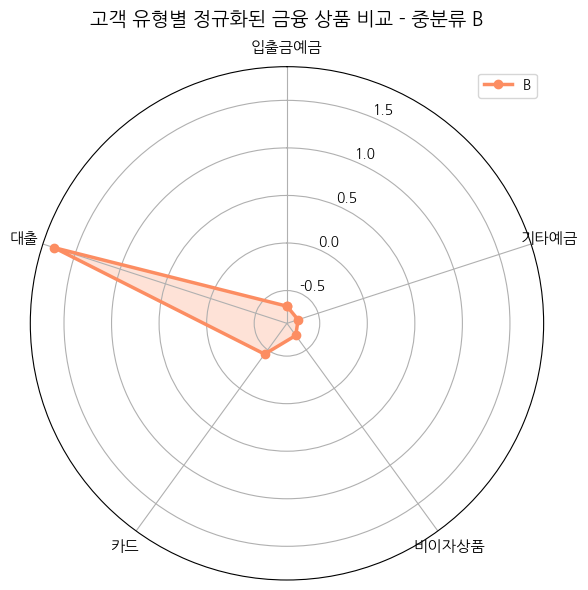

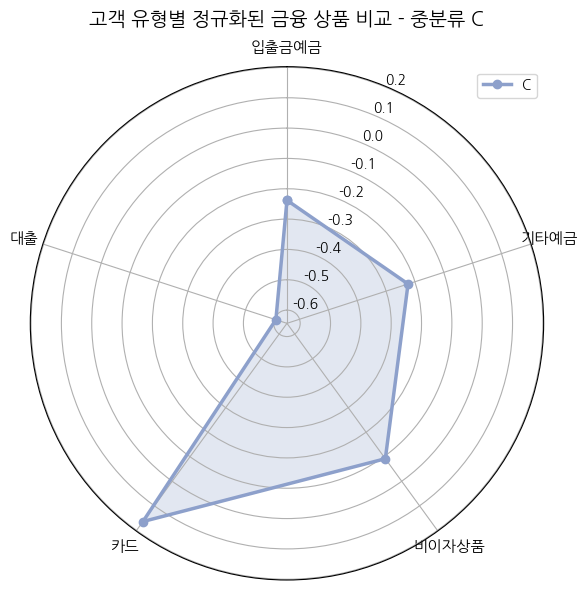

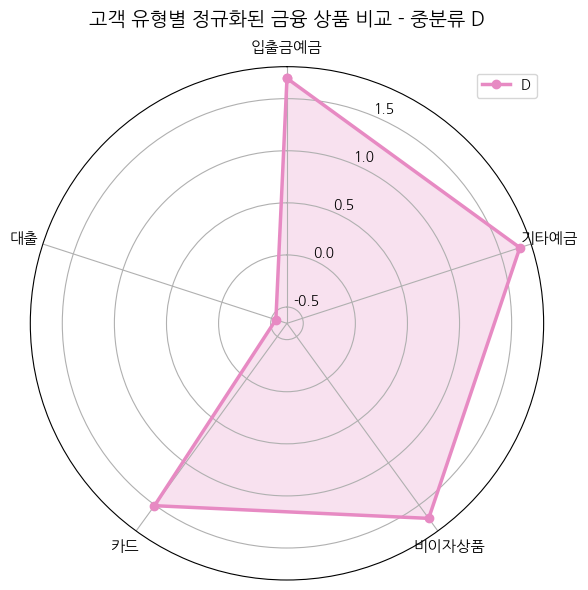

In [24]:
def make_radar_chart_single(data, labels, title_prefix):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    for 중분류 in ordered_labels:  # A~D 개별로 그리기
        row = data[data["중분류"] == 중분류].iloc[0]
        values = row[value_cols].tolist()
        values += values[:1]
        color = color_map[중분류]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

        # ax.plot(angles, values, label=중분류, color=color)
        # ax.fill(angles, values, alpha=0.15, color=color)
        ax.plot(angles, values, label=중분류, color=color, linewidth=2.5, marker="o")
        ax.fill(angles, values, alpha=0.25, color=color)

        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
        ax.set_title(f"{title_prefix} - 중분류 {중분류}", size=14, pad=30)
        ax.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

# 실행
make_radar_chart_single(df_grouped_scaled, short_labels, "고객 유형별 정규화된 금융 상품 비교")


In [25]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# # ▶ circular barplot 함수
# def draw_individual_circular_barplots(df_melt, color_map):
#     unique_groups = df_melt["중분류"].unique()

#     for group in unique_groups:
#         group_df = df_melt[df_melt["중분류"] == group].reset_index(drop=True)

#         num_bars = len(group_df)
#         angles = [n / float(num_bars) * 2 * np.pi for n in range(num_bars)]

#         fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

#         for idx, row in group_df.iterrows():
#             ax.bar(
#                 angles[idx],
#                 row["값"],
#                 width=2 * np.pi / num_bars * 0.9,
#                 color=color_map[group],
#                 edgecolor="white"
#             )

#         ax.set_xticks(angles)
#         ax.set_xticklabels(group_df["항목"], fontsize=11)
#         ax.set_yticklabels([])
#         ax.set_title(f"중분류 {group} 고객 금융 항목 정규화 비교", fontsize=14, pad=30)
#         plt.tight_layout()
#         plt.show()

# # ✅ melt 단계 수정
# # 1. Polars → Pandas로 변환
# df_pd = df.to_pandas()

# # 2. melt는 Pandas 기준으로 수행
# df_melt = df_pd.melt(id_vars="중분류", var_name="항목", value_name="값")

# # ✅ 색상 지정
# color_map = dict(zip(["A", "B", "C", "D"], sns.color_palette("Set2", 4)))

# # ✅ 그래프 출력
# draw_individual_circular_barplots(df_melt, color_map)
